In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Copy of combined_data_1.txt.zip',header=None,names=['Cust ID','Rating'],usecols=[0,1] )

In [5]:
df

,Cust ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [6]:
df.isna().sum()

Cust ID       0
Rating     4499
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust ID  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [8]:
movie_count = df.isnull().sum()

In [9]:
movie_count=df.isnull().sum()
movie_count=movie_count["Rating"]

In [10]:
movie_count

4499

In [11]:
customer_count = df['Cust ID'].nunique()
customer_count

475257

In [12]:
customer_count = customer_count-movie_count

In [13]:
print(customer_count)

470758


In [14]:
df

,Cust ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [15]:
total_ratings = df['Cust ID'].count() - movie_count
total_ratings

24053764

In [16]:
df['Cust ID'].count()

24058263

In [17]:
stars = df.groupby('Rating').count()
stars = pd.DataFrame(stars)

In [18]:
stars.reset_index(inplace=True)

In [19]:
stars

,Rating,Cust ID
0,1.0,1118186
1,2.0,2439073
2,3.0,6904181
3,4.0,8085741
4,5.0,5506583


Text(0.5, 1.0, 'Total Poll: 4499 movies 470758customers')

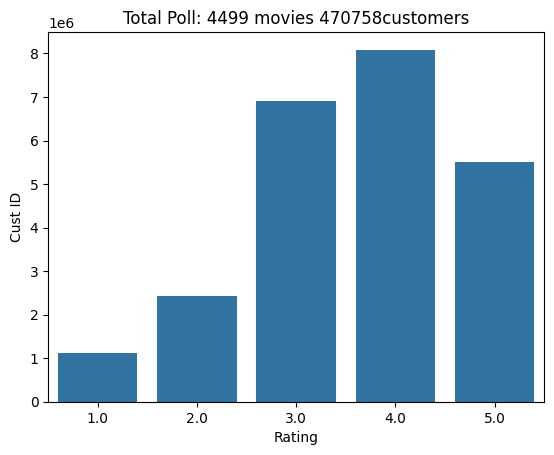

In [20]:
sns.barplot(x=stars['Rating'],y=stars['Cust ID'])
plt.title(f'Total Poll: {movie_count} movies {customer_count}customers')

In [21]:
df_nan = pd.DataFrame(pd.isnull(df['Rating']))

In [22]:
df_nan = df_nan[df_nan['Rating']==True]

In [23]:
df_nan = df_nan.reset_index()

In [24]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [25]:
movie_np = []
movie_id = 1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
  temp = np.full((1,i-j-1),movie_id)
  movie_np = np.append(movie_np,temp)
  movie_id += 1

last_record = np.full((1,len(df)-df_nan.iloc[-1,0]-1),movie_id)
movie_np = np.append(movie_np,last_record)

In [26]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [27]:
len(df_nan['index'][:-1])

4498

In [28]:
24058263-24057834-1

428

In [29]:
df_nan.iloc[-1,0]

24057834

In [30]:
df_nan.shape

(4499, 2)

In [31]:
temp

array([[4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498, 4498,
        4498, 4498, 4498, 4498, 4498, 

In [32]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

In [33]:
len(movie_np)

24053764

In [34]:
len(df)

24058263

In [35]:
df_nan.iloc[-1,0]

24057834

In [36]:
24058263-24057834-1

428

In [37]:
24053764-24057834-1

-4071

In [38]:
df_nan['index'][1:]


1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [39]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [40]:
df_nan.iloc[-1,0]-1

24057833

In [41]:
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [42]:
y=tuple(x)

In [43]:
len(y)

4498

In [44]:
df = df[pd.notnull(df['Rating'])]
df['Movie_id'] = movie_np.astype(int)
df

<ipython-input-44-148a039ea631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_id'] = movie_np.astype(int)


,Cust ID,Rating,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [55]:
dataset_movie_summary = df.groupby('Movie_id')['Rating'].agg(['count'])

In [56]:

#Benchmark

dataset_movie_summary['count'].quantile(0.7)

1798.6

In [47]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [48]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index

In [49]:
len(drop_movie_list)

3149

In [57]:
dataset_cust_summary = df.groupby('Cust ID')['Rating'].agg({'count'})
dataset_cust_summary

,count
Cust ID,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [58]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [59]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark]
drop_cust_list

,count
Cust ID,
10,49
1000004,1
1000027,30
1000035,20
1000038,1
...,...
999964,48
999972,35
999977,14


In [60]:
len(drop_cust_list)

327300

In [68]:
df=df[~df['Movie_id'].isin(drop_movie_list)]
df=df[~df['Cust ID'].isin(drop_cust_list)]
df

,Cust ID,Rating,Movie_id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
...,...,...,...
24056844,267802,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496
24056847,70814,2.0,4496


In [64]:
df['Movie_id'].isin(drop_movie_list)

1           True
2           True
3           True
4           True
5           True
            ... 
24058258    True
24058259    True
24058260    True
24058261    True
24058262    True
Name: Movie_id, Length: 24053764, dtype: bool

In [69]:
df.head()

,Cust ID,Rating,Movie_id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3


In [70]:
df_title = pd.read_csv("/content/drive/MyDrive/netflix dataset /Copy of movie_titles.csv",encoding= 'ISO-8859-1',header=None,usecols = [0,1,2],names=['Movie_Id','Year','Name'])
df_title.set_index('Movie_Id',inplace = True)

In [71]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [72]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163008 sha256=fd24f76b4f05edab8afbd979ef81e5e46e967642e8291b41e56a0d29157f0d7c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [73]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [74]:
reader = Reader()

In [75]:
data = Dataset.load_from_df(df[['Cust ID','Movie_id','Rating']][:100000],reader)

In [76]:
data

In [77]:
model = SVD()

In [78]:
cross_validate(model,data,measures=['RMSE','MAE'],cv=4)

{'test_rmse': array([1.03789393, 1.03335771, 1.03437912, 1.04388407]),
 'test_mae': array([0.8354913 , 0.83093266, 0.83217438, 0.82446145]),
 'fit_time': (1.3364968299865723,
  1.1390392780303955,
  1.2192201614379883,
  1.2026433944702148),
 'test_time': (0.11764669418334961,
  0.10448503494262695,
  0.11867165565490723,
  0.11678576469421387)}

In [84]:
df

,Cust ID,Rating,Movie_id
695,1025579,4.0,3
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
...,...,...,...
24056844,267802,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496
24056847,70814,2.0,4496


In [83]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [85]:
user_1316220	 = df_title.copy()
user_1316220

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [86]:
user_1316220 = user_1316220.reset_index()
user_1316220

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [87]:
user_1316220 = user_1316220[~user_1316220['Movie_Id'].isin(drop_movie_list)]
user_1316220

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [88]:
user_1316220['Estimate_Score'] = user_1316220['Movie_Id'].apply(lambda x:model.predict(1316220,x).est)

<ipython-input-88-11abb4667e0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1316220['Estimate_Score'] = user_1316220['Movie_Id'].apply(lambda x:model.predict(1316220,x).est)


In [89]:
user_1316220

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.657522
7,8,2004.0,What the #$*! Do We Know!?,3.338526
15,16,1996.0,Screamers,3.074086
16,17,2005.0,7 Seconds,2.916487
17,18,1994.0,Immortal Beloved,3.823608
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.569560
17766,17767,2004.0,Fidel Castro: American Experience,3.569560
17767,17768,2000.0,Epoch,3.569560
17768,17769,2003.0,The Company,3.569560
